In [116]:
from scipy import optimize
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# 1. Suppose that 12-month, 24-month, 36-month, 48-month and 60-month zero rates
# are 2.4%, 2.6%, 2.9%, 3% and 3.3% per annum with continuous compounding respectively. Calculate:
# (a) the theoretical price of a bond with a face value of £200 and a maturity of 5
# years that pays a coupon of 4% semiannually

In [3]:
# F is the principal payment of the bond
# M is the annual coupon rate
# m is the number of coupon payments annually
# c is the periodic coupon rate
# R is the annual percentage rate
# t is the time to maturity of the bond, in years
# n is the number of bond payment periods

F = 200
M = 0.04 * F
m = 2
c = M/m
R = 0.033
t = 5
n = t*m


In [41]:
# The bond will be priced by summing the present values of the principal repayment and the coupon payments
# The zero rates are with continous compounding so the equation PV = FVeRT will be used.
# Here I create a list of the future value, FV; the relevant interest rate R; and time period, T for each
# payment to be discounted.
# The first coupon payment is expected in 0.5 years and then every 0.5 years from that until the bond reaches
# maturity in 5 years
# the relevant interest rate to discount at is the zero rate available given the relevant time period for 
# each payment

FVs = [[M/m,0,0.5*x] for x in range(1,n+1)]
FVs[0][1] = 0.024
FVs[1][1] = 0.024
FVs[2][1] = 0.026
FVs[3][1] = 0.026
FVs[4][1] = 0.029
FVs[5][1] = 0.029
FVs[6][1] = 0.03
FVs[7][1] = 0.03
FVs[8][1] = 0.033
FVs[9][1] = 0.033
FVs.append([200,0.033,5])

#I now have a list of 11 seperate future payments in the form 
#[future value, relevant interest rate (R), years to payment (T)]

In [212]:
#Each of the future payments discounted to calculate a present value by taking the future value and
# multipling by e^RT.
#THis is then summed to get the total present value, and rounded to two decimal places because it's currency

P = round(sum([FVs[x][0]*np.exp(-FVs[x][1]*FVs[x][2]) for x in range(0,len(FVs))]),2)
print("the value of bond is £",P)

the value of bond is £ 206.46


In [6]:
#(b) the bond’s yield (please derive the expression for the yield, you may like to
#write some code to solve the expression)


In [214]:
# The yeild is the single discount rate that makes present value of a bond equal to it's market price

#A cost function is created where the present value of the bond is calculated using a yield, y, and then
# subtracted from the value of the bond calculated above.

def yield_opt(yld):
    y = yld/100
    cost = (P-sum([FVs[x][0]*np.exp(-y*FVs[x][2]) for x in range(0,len(FVs))]))**2
    return cost
#An optimizer is then used to minimize the cost function: i.e. find the yield which makes the present value
# of the bond equal to what has already been calculated

print("The yield is", round(optimize.minimize(fun=yield_opt,x0=3.5).x[0],3), "%")


The yield is 3.267 %


In [44]:
# (c) the yield to maturity if the bond was purchased for £168 just after the second coupon payment.

In [216]:
# Current price of bond is purchase price so P is updated
P = 168

In [217]:
# a number of payments are still to be made but not all so the list of future payments is updated

FVsC = [[FVs[x][0],FVs[x][2]-1] for x in range(2,len(FVs))]
print(FVsC)

[[4.0, 0.5], [4.0, 1.0], [4.0, 1.5], [4.0, 2.0], [4.0, 2.5], [4.0, 3.0], [4.0, 3.5], [4.0, 4.0], [200, 4]]


In [218]:
#As before a cost function is created where the present value of the bond is calculated using a yield, y, 
# and then subtracted from the value of the bond

def ytm_opt(yld):
    y = yld/100
    cost = (P-sum([FVsC[x][0]*np.exp(-y*FVs[x][1]) for x in range(0,len(FVs))]))**2
    return cost

print("The yield to maturity is", round(optimize.minimize(fun=yield_opt,x0=3.5).x[0],3), "%")

The yield to maturity is 7.786 %


In [12]:
# 2. Suppose interest rates fluctuates according to
# r(t) = r + 0.03 cos (0.2t),
# (a) Derive an expression for the value of an investment made at t = 0 at some
# future time t with a risk-free interest rate r = 3%.

In [13]:
# (b) Calculate and plot the yield curve.

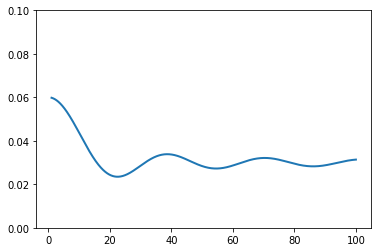

In [219]:
#This is simply plotting the function derived elsewhere

ax.set_title('MATPMD3 Q2(b) Yield Curve')

t = np.arange(1, 100, 0.01)
s = 0.03 + 0.03*np.sin(0.2*t)/(0.2*t)
line, = plt.plot(t, s, lw=2)

plt.ylim(0,0.1)
plt.show()

In [ ]:
# Using a one step binomial tree, derive an expression for a European call option for $\Delta$ units of stock,
# each with a value of S0. A particular stock is currently priced at £40. Three months from now, it will be 
# either £44 or £36. 
# Find the value of a call option on one unit of this stock, when the strike price is £42 and the risk-free 
# interest rate is 6%

In [220]:
#I use python to calculate P

p =(np.exp(0.06*0.25)-0.9)/(1.1-0.9)
print("P is",p)

P is 0.5755653230785943


In [15]:
# The underlying assumption in quantitative finance is that stock prices follow an It\^{o} process of some 
# kind and hence the [daily] movements are Normally distributed. In this problem you will investigate the 
# validity of this assumption.
# You will first need to get some data. Firstly, you will need to decide on a company and obtain the code
# with which it is listed; you can download the list of symbols for companies from
# http://investexcel.net/all-yahoo-finance-stock-tickers/. Once you have this code (called the ticker) you 
# can download the historic prices from yahoo finance.

# (a) Choose 3 tickers (you may pick any company you wish but they should be from different industries,
# e.g. tech, mining, food etc).
# (b) Plot the daily movements (the amount gained or lost in a day) as a histogram.

In [222]:
# Import the raw data downloaded from yahoo for BASF, Fonterra, and Mowi

BASF_raw = pd.read_csv('F:/DataMasters/MD3-FinanceAndMedicine/BAS.DE.csv')
Fonterra_raw = pd.read_csv('F:/DataMasters/MD3-FinanceAndMedicine/FCG.NZ.csv')
Mowi_raw = pd.read_csv('F:/DataMasters/MD3-FinanceAndMedicine/MOWI.OL.csv')

In [17]:
# BASF_raw.head()

In [97]:
# I'm defining two functions, one calculating and absolute stock price change the other calculating a 
# relative stock price change

def daily_movement(op, cl):
    dm = cl - op
    return dm
"""This function calculates net the daily stock price movement by sutracking the opening price
from the closing price"""

def rel_daily_movement(op, cl):
    dm = (cl - op)/op
    return dm
"""This function calculates net the relative daily stock price movement by subtracking the opening price
from the closing price and dividing by the opening stock price"""

# The two functions are then applied to the stock price data to create two new columns giving absolute and
# relative daily price movements


BASF_data = BASF_raw
BASF_data['Movement'] = BASF_data.apply(lambda row: daily_movement(row.Open, row.Close), axis=1)
BASF_data['Rel_Move'] = BASF_data.apply(lambda row: rel_daily_movement(row.Open, row.Close), axis=1)

Fonterra_data = Fonterra_raw
Fonterra_data['Movement'] =Fonterra_data.apply(lambda row: daily_movement(row.Open, row.Close), axis=1)
Fonterra_data['Rel_Move'] = Fonterra_data.apply(lambda row: rel_daily_movement(row.Open, row.Close), axis=1)


Mowi_data = Mowi_raw
Mowi_data['Movement'] = Mowi_data.apply(lambda row: daily_movement(row.Open, row.Close), axis=1)
Mowi_data['Rel_Move'] = Mowi_data.apply(lambda row: rel_daily_movement(row.Open, row.Close), axis=1)

In [92]:
#Fonterra_data.head(781)

In [93]:
#Mowi_data.head()

In [223]:
# BASF_data.head()

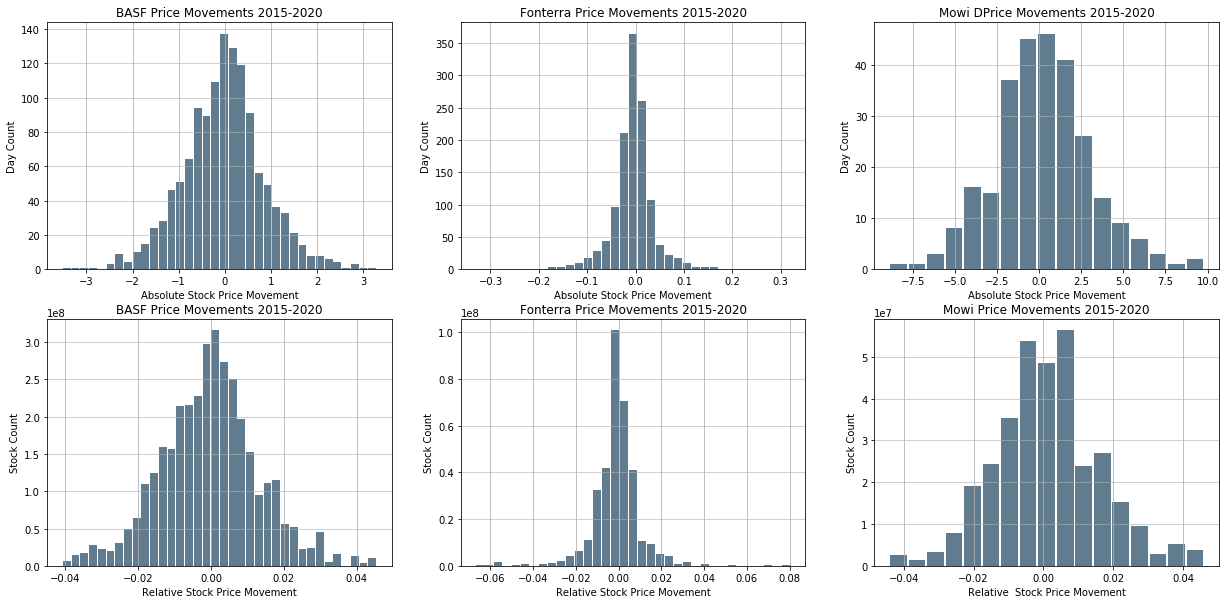

In [22]:
# An inital histogram plot of daily stock price movements for the three companies

plt.subplot(2, 3, 1)
BASF_data['Movement'].plot.hist(grid=True,
                                bins=round(len(BASF_data)**(1/2)),
                                rwidth=0.9,
                                color='#607c8e',
                                figsize=(21,10))
plt.title('BASF Price Movements 2015-2020')
plt.xlabel('Absolute Stock Price Movement')
plt.ylabel('Day Count')
plt.grid(axis='y', alpha=0.75)

plt.subplot(2, 3, 2)
Fonterra_data['Movement'].plot.hist(grid=True,
                                bins=round(len(Fonterra_data)**(1/2)),
                                rwidth=0.9,
                                color='#607c8e',)
plt.title('Fonterra Price Movements 2015-2020')
plt.xlabel('Absolute Stock Price Movement')
plt.ylabel('Day Count')
plt.grid(axis='y', alpha=0.75)

plt.subplot(2, 3, 3)
Mowi_data['Movement'].plot.hist(grid=True,
                                bins=round(len(Mowi_data)**(1/2)),
                                rwidth=0.9,
                                color='#607c8e',)
plt.title('Mowi DPrice Movements 2015-2020')
plt.xlabel('Absolute Stock Price Movement')
plt.ylabel('Day Count')
plt.grid(axis='y', alpha=0.75)

#Three more plots make two changes to the above plots of stock price movements for the three companies:
# 1. Relative stock price changes are used rather than absolute changes
# 2. Each day's movement is no longer weighted equally, instead movements are weighted according to the volume
# of stock sold that day

plt.subplot(2, 3, 4)
BASF_data['Rel_Move'].plot.hist(grid=True,
                                bins=round(len(BASF_data)**(1/2)),
                                rwidth=0.9,
                                color='#607c8e',
                                weights=BASF_data['Volume'])
plt.title('BASF Price Movements 2015-2020')
plt.xlabel('Relative Stock Price Movement')
plt.ylabel('Stock Count')
plt.grid(axis='y', alpha=0.75)

plt.subplot(2, 3, 5)
Fonterra_data['Rel_Move'].plot.hist(grid=True,
                                    bins=round(len(Fonterra_data)**(1/2)),
                                    rwidth=0.9,
                                    color='#607c8e',
                                    weights=Fonterra_data['Volume'])
plt.title('Fonterra Price Movements 2015-2020')
plt.xlabel('Relative Stock Price Movement')
plt.ylabel('Stock Count')
plt.grid(axis='y', alpha=0.75)

plt.subplot(2, 3, 6)
Mowi_data['Rel_Move'].plot.hist(grid=True,
                                    bins=round(len(Mowi_data)**(1/2)),
                                    rwidth=0.9,
                                    color='#607c8e',
                                    weights=Mowi_data['Volume'])
plt.title('Mowi Price Movements 2015-2020')
plt.xlabel('Relative  Stock Price Movement')
plt.ylabel('Stock Count')
plt.grid(axis='y', alpha=0.75)

In [23]:
#(c) Determine whether or not these daily fluctuations are Normally distributed?
# (A $\chi $-squared test for a goodness of fit to a normal distribution will tell you whether or not a null 
# hypothesis of normality is to be rejected).

In [24]:
#Determining BASF distribution of movements wrt absolute price changes weighted by day

BASF_am_min = min(BASF_data['Movement'])
BASF_am_max = max(BASF_data['Movement'])
BASF_am_range = BASF_am_max - BASF_am_min
BASF_am_bin_no = round(len(BASF_data)**(1/2))
BASF_am_bin_size = BASF_am_range / BASF_am_bin_no

BASF_bas_counts = [0 for x in range(0,BASF_am_bin_no)]

for x in range(0,len(BASF_data)):
    BASF_bas_counts[int((BASF_data['Movement'][x]-BASF_am_min)//BASF_am_bin_size)] += 1

In [25]:
#Determining BASF distribution of movements wrt relative price changes weighted by sales volume

BASF_rm_min = min(BASF_data['Rel_Move'])
BASF_rm_max = max(BASF_data['Rel_Move'])
BASF_rm_range = BASF_rm_max - BASF_rm_min
BASF_rm_bin_no = round(len(BASF_data)**(1/2))
BASF_rm_bin_size = BASF_rm_range / BASF_rm_bin_no

BASF_mod_counts = [0 for x in range(0,BASF_rm_bin_no)]

for x in range(0,len(BASF_data)):
    BASF_mod_counts[int((BASF_data['Rel_Move'][x]-BASF_rm_min)//BASF_rm_bin_size)] += BASF_data['Volume'][x]

In [26]:
#Determining Fonterra distribution of movements wrt absolute price changes weighted by day

Fonterra_am_min = min(Fonterra_data['Movement'])
Fonterra_am_max = max(Fonterra_data['Movement'])
Fonterra_am_range = Fonterra_am_max - Fonterra_am_min
Fonterra_am_bin_no = round(len(Fonterra_data)**(1/2))
Fonterra_am_bin_size = Fonterra_am_range / Fonterra_am_bin_no

Fonterra_bas_counts = [0 for x in range(0,Fonterra_am_bin_no)]

for x in range(0,len(Fonterra_data)):
    Fonterra_bas_counts[int((Fonterra_data['Movement'][x]-Fonterra_am_min)//Fonterra_am_bin_size)] += 1

In [27]:
#Determining Fonterra distribution of movements wrt relative price changes weighted by sales volume

Fonterra_rm_min = min(Fonterra_data['Rel_Move'])
Fonterra_rm_max = max(Fonterra_data['Rel_Move'])
Fonterra_rm_range = Fonterra_rm_max - Fonterra_rm_min
Fonterra_rm_bin_no = round(len(Fonterra_data)**(1/2))
Fonterra_rm_bin_size = Fonterra_rm_range / Fonterra_rm_bin_no

Fonterra_mod_counts = [0 for x in range(0,Fonterra_rm_bin_no)]

for x in range(0,len(Fonterra_data)):
    Fonterra_mod_counts[int((Fonterra_data['Rel_Move'][x]-Fonterra_rm_min)//Fonterra_rm_bin_size)] += Fonterra_data['Volume'][x]

In [28]:
#Determining Mowi distribution of movements wrt absolute price changes weighted by day

Mowi_am_min = min(Mowi_data['Movement'])
Mowi_am_max = max(Mowi_data['Movement'])
Mowi_am_range = Mowi_am_max - Mowi_am_min
Mowi_am_bin_no = round(len(Mowi_data)**(1/2))
Mowi_am_bin_size = Mowi_am_range / Mowi_am_bin_no

Mowi_bas_counts = [0 for x in range(0,Mowi_am_bin_no)]

for x in range(0,len(Mowi_data)):
    Mowi_bas_counts[int((Mowi_data['Movement'][x]-Mowi_am_min)//Mowi_am_bin_size)] += 1

In [75]:
#Determining Mowi distribution of movements wrt relative price changes weighted by sales volume

Mowi_rm_min = min(Mowi_data['Rel_Move'])
Mowi_rm_max = max(Mowi_data['Rel_Move'])

Mowi_rm_range = Mowi_rm_max - Mowi_rm_min
Mowi_rm_bin_no = round(len(Mowi_data)**(1/2))
Mowi_rm_bin_size = Mowi_rm_range / Mowi_rm_bin_no

Mowi_mod_counts = [0 for x in range(0,Mowi_rm_bin_no)]

for x in range(0,len(Mowi_data)):
    Mowi_mod_counts[int(((Mowi_data['Rel_Move'][x]-(0.1**10))-Mowi_rm_min)//Mowi_rm_bin_size)] += Mowi_data['Volume'][x]

In [30]:
#Then here I run a test where H0 is that the distribution is normal. P values are calculated.

k2_BASF_bas, p_BASF_bas = stats.normaltest(BASF_bas_counts, axis=0, nan_policy='propagate')
k2_BASF_mod, p_BASF_mod = stats.normaltest(BASF_mod_counts, axis=0, nan_policy='propagate')
k2_Fonterra_bas, p_Fonterra_bas = stats.normaltest(Fonterra_bas_counts, axis=0, nan_policy='propagate')
k2_Fonterra_mod, p_Fonterra_mod = stats.normaltest(Fonterra_mod_counts, axis=0, nan_policy='propagate')
k2_Mowi_bas, p_Mowi_bas = stats.normaltest(Mowi_bas_counts, axis=0, nan_policy='propagate')
k2_Mowi_mod, p_Mowi_mod = stats.normaltest(Mowi_mod_counts, axis=0, nan_policy='propagate')

alpha = 0.05

print(f"2-sided chi squared probability that BASF stock moves are normally distrubted is {p_BASF_bas}")
print(f"2-sided chi squared probability that BASF stock moves are normally distrubted is {p_BASF_mod}")
print(f"2-sided chi squared probability that Fonterra stock moves are normally distrubted is {p_Fonterra_bas}")
print(f"2-sided chi squared probability that Fonterra stock moves are normally distrubted is {p_Fonterra_mod}")
print(f"2-sided chi squared probability that Mowi stock moves are normally distrubted is {p_Mowi_bas}")
print(f"2-sided chi squared probability that Mowi stock moves are normally distrubted is {p_Mowi_mod}")


2-sided chi squared probability that BASF stock moves are normally distrubted is 0.018496654589789954
2-sided chi squared probability that BASF stock moves are normally distrubted is 0.08096065752556185
2-sided chi squared probability that Fonterra stock moves are normally distrubted is 1.0069518520102775e-09
2-sided chi squared probability that Fonterra stock moves are normally distrubted is 8.070636968194786e-10
2-sided chi squared probability that Mowi stock moves are normally distrubted is 0.20278972936114453
2-sided chi squared probability that Mowi stock moves are normally distrubted is 0.2644931407832821


C:\Users\Liam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [31]:
# (d) Plot a time series plot of two of your stocks. Does the times series follow an It\^{o} process? 
# (I’m asking for your thoughts rather than a strict test of the condition).


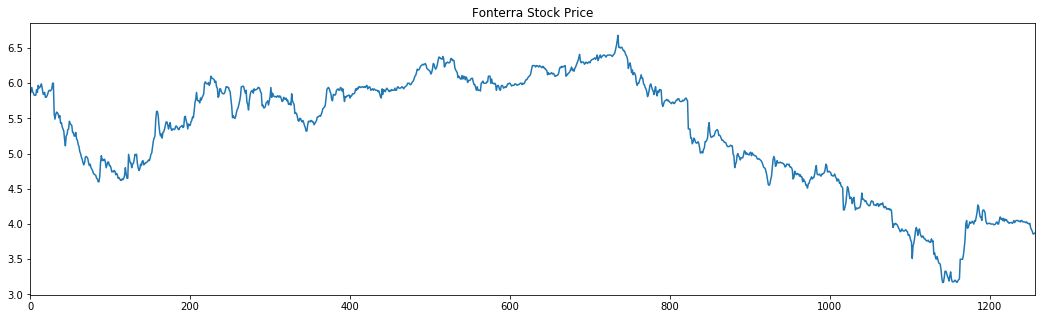

In [88]:
Fonterra_data['Close'].plot( title = 'Fonterra Stock Price', figsize = (18,5))

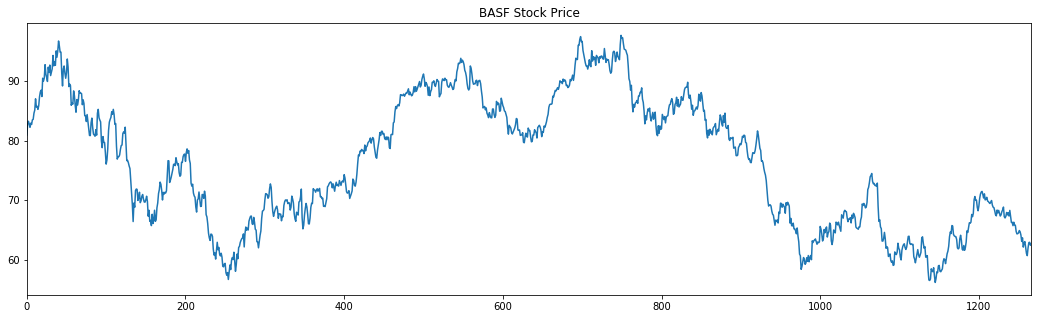

In [99]:
BASF_data['Close'].plot( title = 'BASF Stock Price', figsize = (18,5))

In [203]:
#  Comment on your findings. Some things you may wish to comment on are:
# • Are the prices Normally distributed over every timescale (can you identify a period where the movements
# are/are not Normally distributed)?
# • Does the assumption of Normality only apply to some sectors?
# • What happens in the case of a disruption (e.g. house builders share prices in the event of a market
# collapse, for example in 2006-2008, or food companies after a scare or fraud, for example coca-cola after 
# the negative press for their Desani drink)

In [204]:
#I look at a subsection of fonterra data between two upheavels for the company to check distribution of
# stock price movements in more stables times.

Fonterra_sub = Fonterra_data.loc[740:1139,]

def indexer(dt):
    m = Fonterra_sub.loc[Fonterra_sub['Date']==dt].index
    ix = m[0]
    return ix

Fonterra_sub['indexed'] = Fonterra_sub.apply(lambda row: indexer(row.Date), axis=1)

C:\Users\Liam\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [224]:
#I run a linear regression to determine a function for drift

regr = linear_model.LinearRegression()

index = [[Fonterra_sub['indexed'][x],] for x in range(740,740+len(Fonterra_sub))]

lin_mod = regr.fit(index,Fonterra_sub['Close'])

In [210]:
#the residuals of the drift function are then checked for normal distribution as earlier
# with a P value calculated

res = [Fonterra_sub['Close'][x+740]-linear_model.LinearRegression.predict(lin_mod,index)[x]
       for x in range(len(Fonterra_sub['indexed']))]

k2_res, p_res = stats.normaltest(res, axis=0, nan_policy='propagate')

print(p_res)

0.05630327856921413
